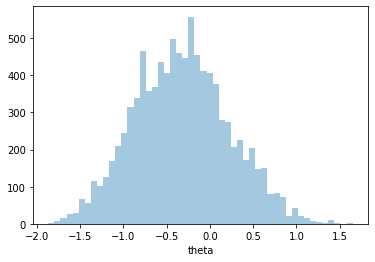

-0.3215478136501531
The 95% credible set is  -1.3938910901776493 0.7507954628773432


In [32]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(6)

data = np.array([-2, -3, 4, -7,0,4])
theta = 1 # initial value
thetas = [theta]

def sum_theta(data, theta):
    total = 0
    for i in data:
        c = i - theta
        total += c**2/8
    return total

for i in range(10000):
    theta_prop = np.random.uniform(-2,2)
    prod_1 = np.exp(-sum_theta(data, theta_prop))
    prod_2 = np.exp(-sum_theta(data, theta))
    
    r = ((1+np.cos(np.pi*theta_prop/2))/2*prod_1)/((1+np.cos(np.pi*theta/2))/2*prod_2)
    
    rho = np.amin([r,1])
    z = np.random.uniform()
    if rho > z:
        theta = theta_prop
    thetas.append(theta)

    
thetas = thetas[501:]
sns.distplot(thetas, kde = False, axlabel ="theta")
plt.show()

B_estimator = np.mean(thetas)
print (B_estimator)

var = np.var(thetas)

ubl = B_estimator + 1.96*np.sqrt(var)
lbl = B_estimator - 1.96*np.sqrt(var)

print ("The 95% credible set is ",lbl,ubl)

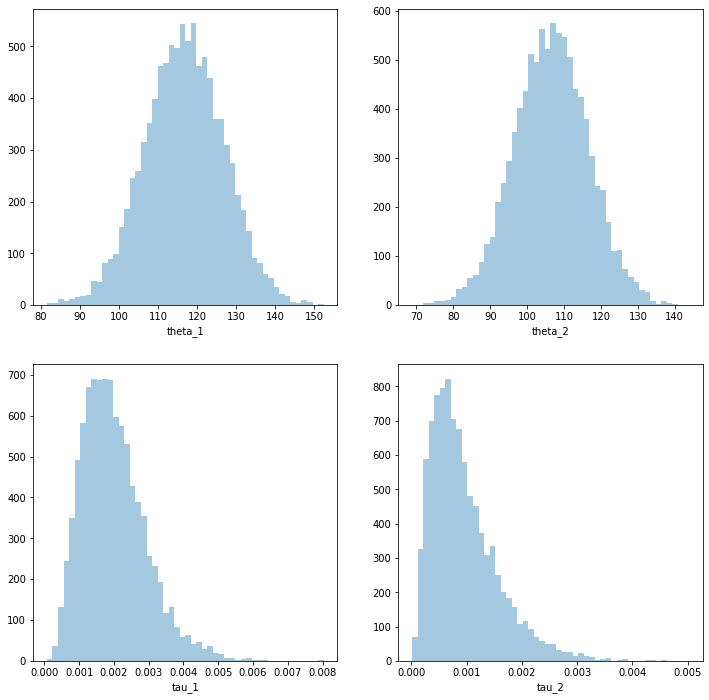

The proportion of positive differences is: 0.7596589114643647
2.5% percentile: -17.855783722972536
97.5% percentile: 38.73976589733353


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


np.random.seed(6)
data_1 = np.array([134, 146, 104, 119, 124, 161, 107, 83, 113, 129, 97, 123])
data_2 = np.array([70, 118, 101, 85, 107, 132, 94])

def probability(data):
    total = sum(data)
    n = len(data)
    thetas = np.array([])
    taus = np.array([])
    theta_0 = 110 
    tau_0= 1/100
    a = 0.01
    b = 4
    
    #initial values
    theta = 110
    tau = 0.0025
    
    for i in range(10000):
        theta_new = np.random.normal((tau*total+tau_0*theta_0)/(tau_0+n*tau),np.sqrt(1/tau_0+n*tau))
        tau_new = np.random.gamma(a + n/2,  1/(b+1/2 * np.sum((data_1 - theta_new)**2)))
        thetas = np.append(thetas, theta_new)
        taus = np.append(taus, tau_new)
        theta = theta_new
        tau = tau_new
    
    return thetas[501:], taus[501:]

thetas_1, taus_1 = probability(data_1)

thetas_2, taus_2 = probability(data_2)

plt.figure(figsize=(12,12))
plt.subplot(2, 2, 1)
sns.distplot(thetas_1, kde=False, axlabel="theta_1")
plt.subplot(2, 2, 2)
sns.distplot(thetas_2, kde=False, axlabel="theta_2")
plt.subplot(2, 2, 3)
sns.distplot(taus_1, kde=False, axlabel="tau_1")
plt.subplot(2, 2, 4)
sns.distplot(taus_2, kde=False, axlabel="tau_2")
plt.show()


print ("The proportion of positive differences is:", sum(thetas_1-thetas_2>0)/len(thetas_1))

print ("2.5% percentile:", np.percentile(thetas_1-thetas_2, 2.5))
print ("97.5% percentile:", np.percentile(thetas_1-thetas_2, 97.5))
plt.show()

